<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#283618;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Unsupervised Learning Approach - Feature Extraction - VGG16 - Transfer Learning
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
  Libraries
             </p> </div>

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
import cv2

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Get the Data
             </p> </div>

In [63]:
images_dir = r"C:\Users\User\OneDrive - Centennial College\Desktop\FaceMaskDetection_DeepLearning\images"

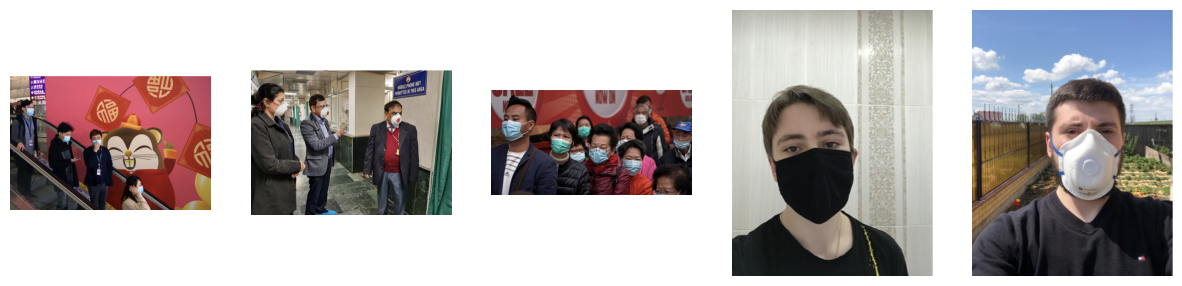

In [64]:
# Function to visualize images
def visualize_images(images_dir, num_images=5):
    # Get a list of all image files in the directory
    image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith(('png', 'jpg', 'jpeg'))]

    # Shuffle the list of image files (optional)
    import random
    random.shuffle(image_files)

    # Visualize a subset of images
    num_images = min(num_images, len(image_files))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_path in enumerate(image_files[:num_images]):
        # Load and display the image
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()
    
    # Visualize some images
visualize_images(images_dir, num_images=5)

In [65]:
# Function to count the number of images
def count_images(images_dir):
    # Get a list of all image files in the directory
    image_files = [file for file in os.listdir(images_dir) if file.endswith(('png', 'jpg', 'jpeg'))]
    num_images = len(image_files)
    print("Number of images:", num_images)
    
# Total of images 
count_images(images_dir)

Number of images: 853


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   VGG concept
             </p> </div>

https://lekhuyen.medium.com/an-overview-of-vgg16-and-nin-models-96e4bf398484

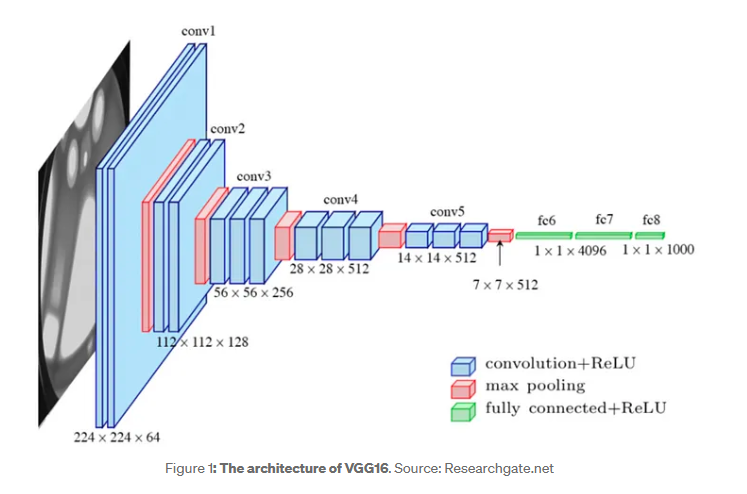

- 13 Convolutional layer 
- 5 Max pooling layer
- 3 Fully Connected layers
- input image size 224x224x3
- called VGG16 because there are 13 conv and 3 fully connected


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   Preparing the Data for Pre-trained Model             </p> </div>

In [129]:
def preprocess_images(images_dir):
    preprocessed_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith(('png', 'jpg', 'jpeg')):
            # Construct the full path to the image file
            img_path = os.path.join(images_dir, filename)
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224)) # size accepted for VGG
            img_array = image.img_to_array(img) # convert image to array
            img_array = np.expand_dims(img_array, axis=0) #Expand dimensions to match the input shape expected by VGG16
            img_array = preprocess_input(img_array) # Preprocess the input by subtracting the mean pixel value from ImageNet dataset
            
            # Normalize the pixel values to the range [0, 1]
            img_array = img_array / 255.0

            preprocessed_images.append(img_array)
    return np.vstack(preprocessed_images)

# Preprocess all images in the directory
preprocessed_data = preprocess_images(images_dir)
print("Shape of preprocessed data:", preprocessed_data.shape)



Shape of preprocessed data: (853, 224, 224, 3)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Pre-trained Models strategies
             </p> </div>

https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751

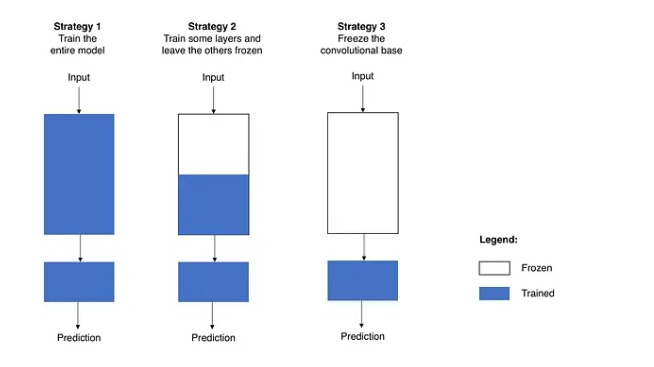



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: We are going to apply transfer learning here using strategy 2, train some layers and leave the others frozen
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Transfer learning Model - VGG16 Adding part of Layers Manually
             </p> </div>

In [130]:
# Remove the top layers of the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Flatten the output of the base model
x = Flatten()(base_model.output)
# Add additional fully connected layers
x = Dense(512, activation='relu')(x) #
x = Dense(256, activation='relu')(x)
# Add more fully connected layers
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Create the transfer learning model
transfer_learning_model = Model(inputs=base_model.input, outputs=x)

# Print the summary of the transfer learning model
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [131]:
# Use the base model to extract features
features_base_model = base_model.predict(preprocessed_data)
print("Shape of extracted features from the base model:", features_base_model.shape)

27/27 [==============================] - 2533s 91s/step
Shape of extracted features from the base model: (853, 7, 7, 512)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    PCA
             </p> </div>

In [132]:
# Flatten the extracted features
num_samples, height, width, channels = features_base_model.shape
flattened_features = features_base_model.reshape((num_samples, height * width * channels))

# Apply PCA to reduce dimensionality
num_components = 100 # Adjust the number of components as needed
pca = PCA(n_components=num_components)
reduced_features = pca.fit_transform(flattened_features)


# Print the shape of the reduced features
print("Shape of reduced features after PCA:", reduced_features.shape)


Shape of reduced features after PCA: (853, 100)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#283618;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Clustering 
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    K-means clustering
             </p> </div>

c:\Users\User\newConda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.113301985


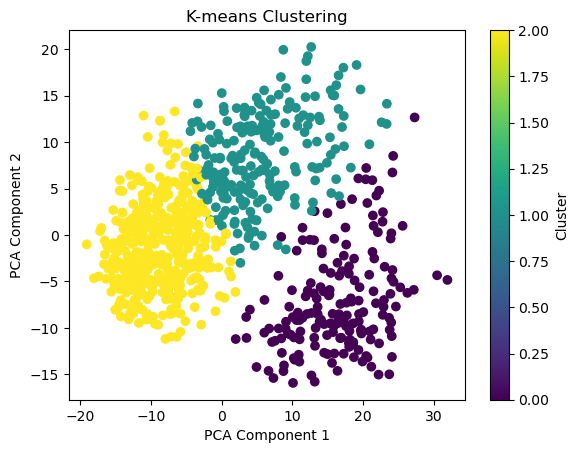

In [143]:
from sklearn.metrics import silhouette_score
# Apply K-means clustering

kmeans = KMeans(n_clusters=3)
cluster_labels_km = kmeans.fit_predict(reduced_features)


silhouette_score_km = silhouette_score(reduced_features, cluster_labels_km)
print("Silhouette Score:", silhouette_score_km)

# Visualize clusters in 2D
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels_km, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: Silhouette Score for K-means is 0.113301985
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Hierarchical Clustering
             </p> </div>

Silhouette Score: 0.09248831


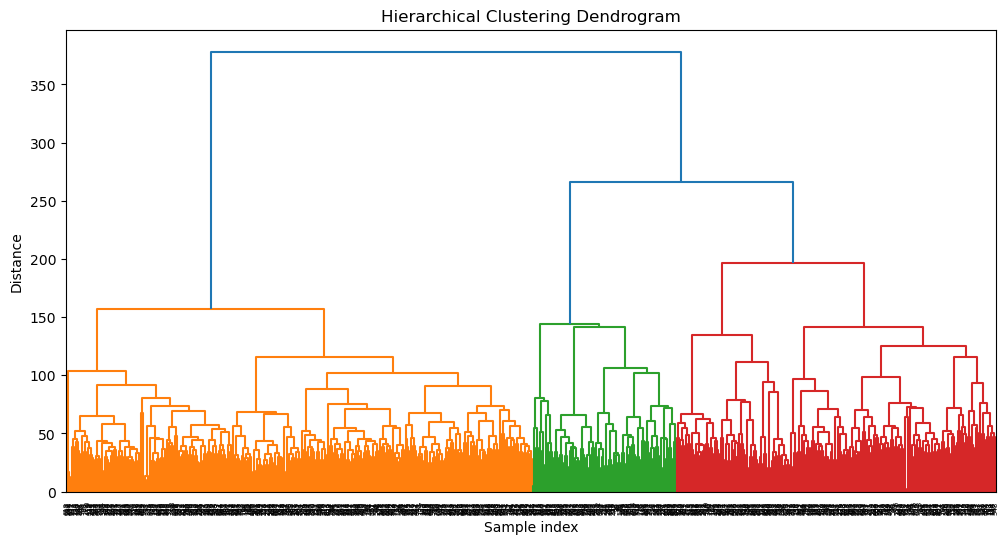

In [144]:
from sklearn.metrics import silhouette_score

# Compute the linkage matrix
linkage_matrix = linkage(reduced_features, method='ward')

# Perform hierarchical clustering and obtain cluster labels
num_clusters = 3  # Adjust the number of clusters as needed
cluster_labels_hc = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Compute the silhouette score
silhouette_score_hc = silhouette_score(reduced_features, cluster_labels_hc)
print("Silhouette Score:", silhouette_score_hc)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: Silhouette Score for Hierarchical Clustering is 0.09248831
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#606c38;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   GMM
             </p> </div>

Silhouette Score: 0.11343965


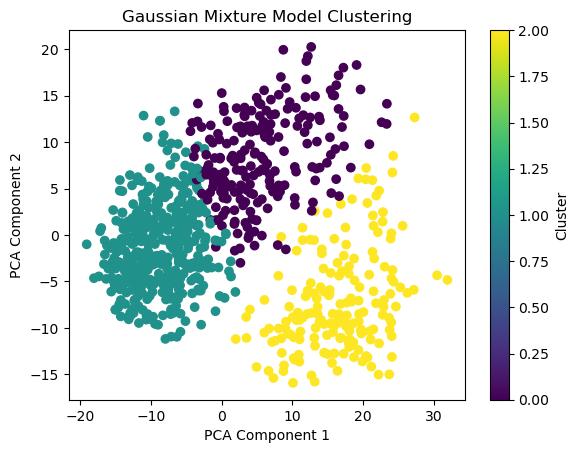

In [151]:
from sklearn.metrics import silhouette_score

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(reduced_features)

# Obtain cluster labels
cluster_labels_gmm = gmm.predict(reduced_features)

# Compute the silhouette score
silhouette_score_gmm = silhouette_score(reduced_features, cluster_labels_gmm)
print("Silhouette Score:", silhouette_score_gmm)

# Plot the cluster assignments
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels_gmm, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Gaussian Mixture Model Clustering')
plt.colorbar(label='Cluster')
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: Silhouette Score for Gaussian Mixture Model is 0.11343965
             </p> </div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Note: silhouette score is a useful metric for evaluating clustering algorithms and determining the quality of the resulting clusters.
    <p> - A score close to +1 indicates that the sample is well-clustered and lies far away from neighboring clusters.</p>
    <p> - A score close to 0 indicates that the sample is close to the decision boundary between two neighboring clusters.</p>
    <p> - A score close to -1 indicates that the sample may have been assigned to the wrong cluster.</p>
             </p> </div>
          

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Comparison:  Km:0.113301985 HC:0.09248831 GMM: 0.11343965 
    <p> While all the silhouette scores indicate moderate performance, it's noteworthy that among the algorithms tested, Gaussian Mixture Model (GMM) demonstrates a slightly better performance compared to K-means.
             </p> </div>

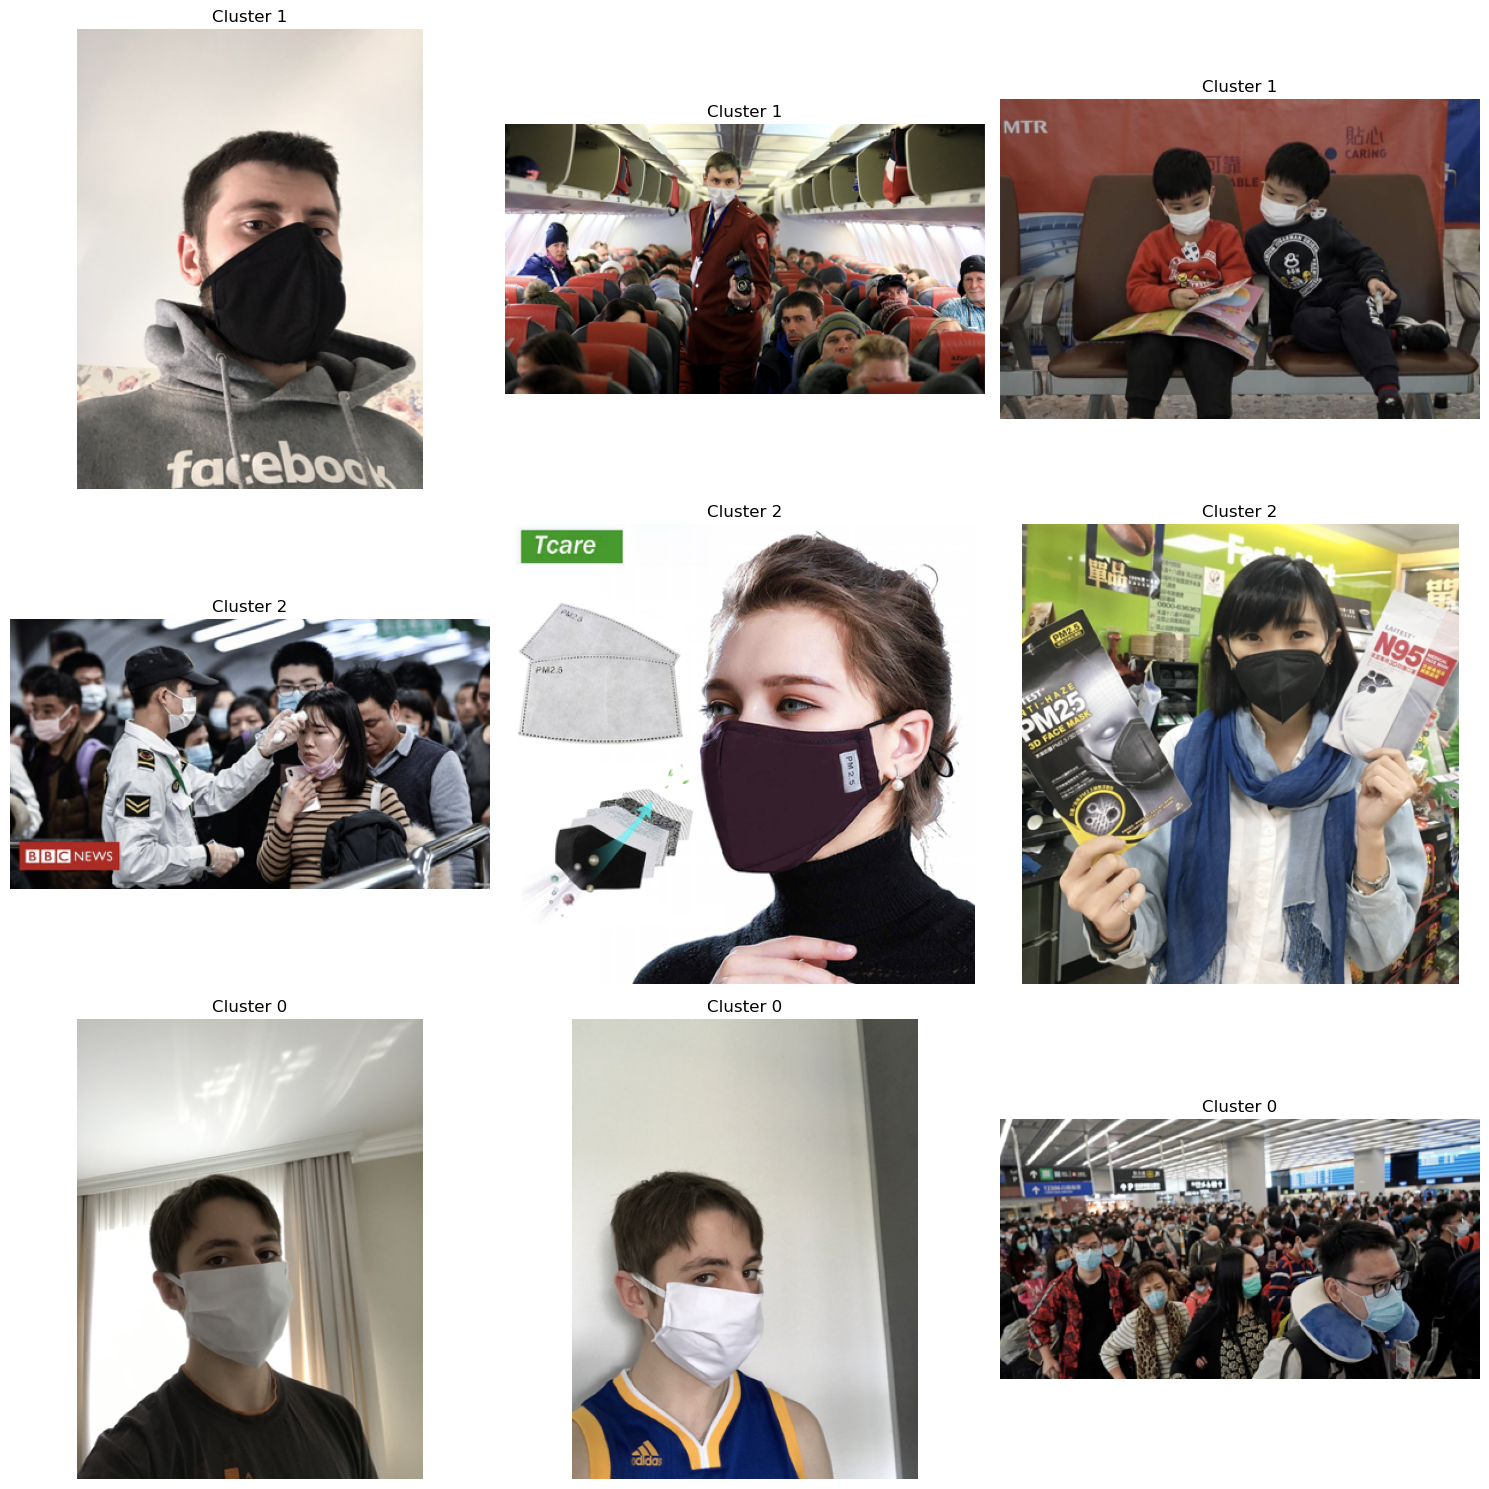

In [150]:
def print_images_with_clusters(images_dir, cluster_labels, num_images_per_cluster=3):
    # Initialize a dictionary to store images for each cluster
    cluster_images = {cluster: [] for cluster in set(cluster_labels)}

    # Get a list of all image files in the directory
    image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith(('png', 'jpg', 'jpeg'))]

    # Shuffle the list of image files (optional)
    import random
    random.shuffle(image_files)

    # Collect images for each cluster
    for image_path, label in zip(image_files, cluster_labels):
        cluster_images[label].append(image_path)

    # Initialize a figure to display the images
    num_clusters = len(set(cluster_images))
    fig, axes = plt.subplots(num_clusters, num_images_per_cluster, figsize=(15, 5 * num_clusters))
    
    # Plot images for each cluster
    for cluster, images in cluster_images.items():
        for i, image_path in enumerate(images[:num_images_per_cluster]):
            # Load the image in BGR format
            image_bgr = cv2.imread(image_path)
            # Convert BGR to RGB
            image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
            
            # Display the image
            axes[cluster - 1, i].imshow(image_rgb)  # Subtract 1 from cluster label
            axes[cluster - 1, i].set_title(f'Cluster {cluster}')
            axes[cluster - 1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Print images with their cluster labels
print_images_with_clusters(images_dir, cluster_labels_gmm, num_images_per_cluster=3)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d4a373;
           font-size:80%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<p>This is the graph of the images with their cluster labels from the GMM technique, as it is the best among others.  </p>
<p>- Even though the GMM score was not a good score, we can still see some patterns, for example in group 1 we see that there are two images that contain chairs, in the second group images that contain words, and the last images in the group that are selfie. </p>
 </div>